## Chapter 2: End to End Machine Learning Project

ML Process using a modified California Dataset. Code based on the book, chapter II "End to End Machine Learning Project".

Own experiments with dataset, code, pipelines and transformers

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import urllib.request
import os
import matplotlib.pyplot as plt


In [2]:
def load_data(url, destination, filename):
    filepath = os.path.join(destination, filename)
    
    if not os.path.isdir(destination):
        os.makedirs(destination)
    
    if not os.path.isfile(filepath):
        urllib.request.urlretrieve(url, filepath)
    else:
        print("File already exists.")

    return pd.read_csv(filepath)

In [3]:
url = "https://raw.githubusercontent.com/ageron/data/main/housing/housing.csv"
destination = "datasets"
filename = "housing.csv"

In [4]:
data=load_data(url, destination, filename)

File already exists.


### 1. Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Count empty values in each column
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Inspection of categorical data
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

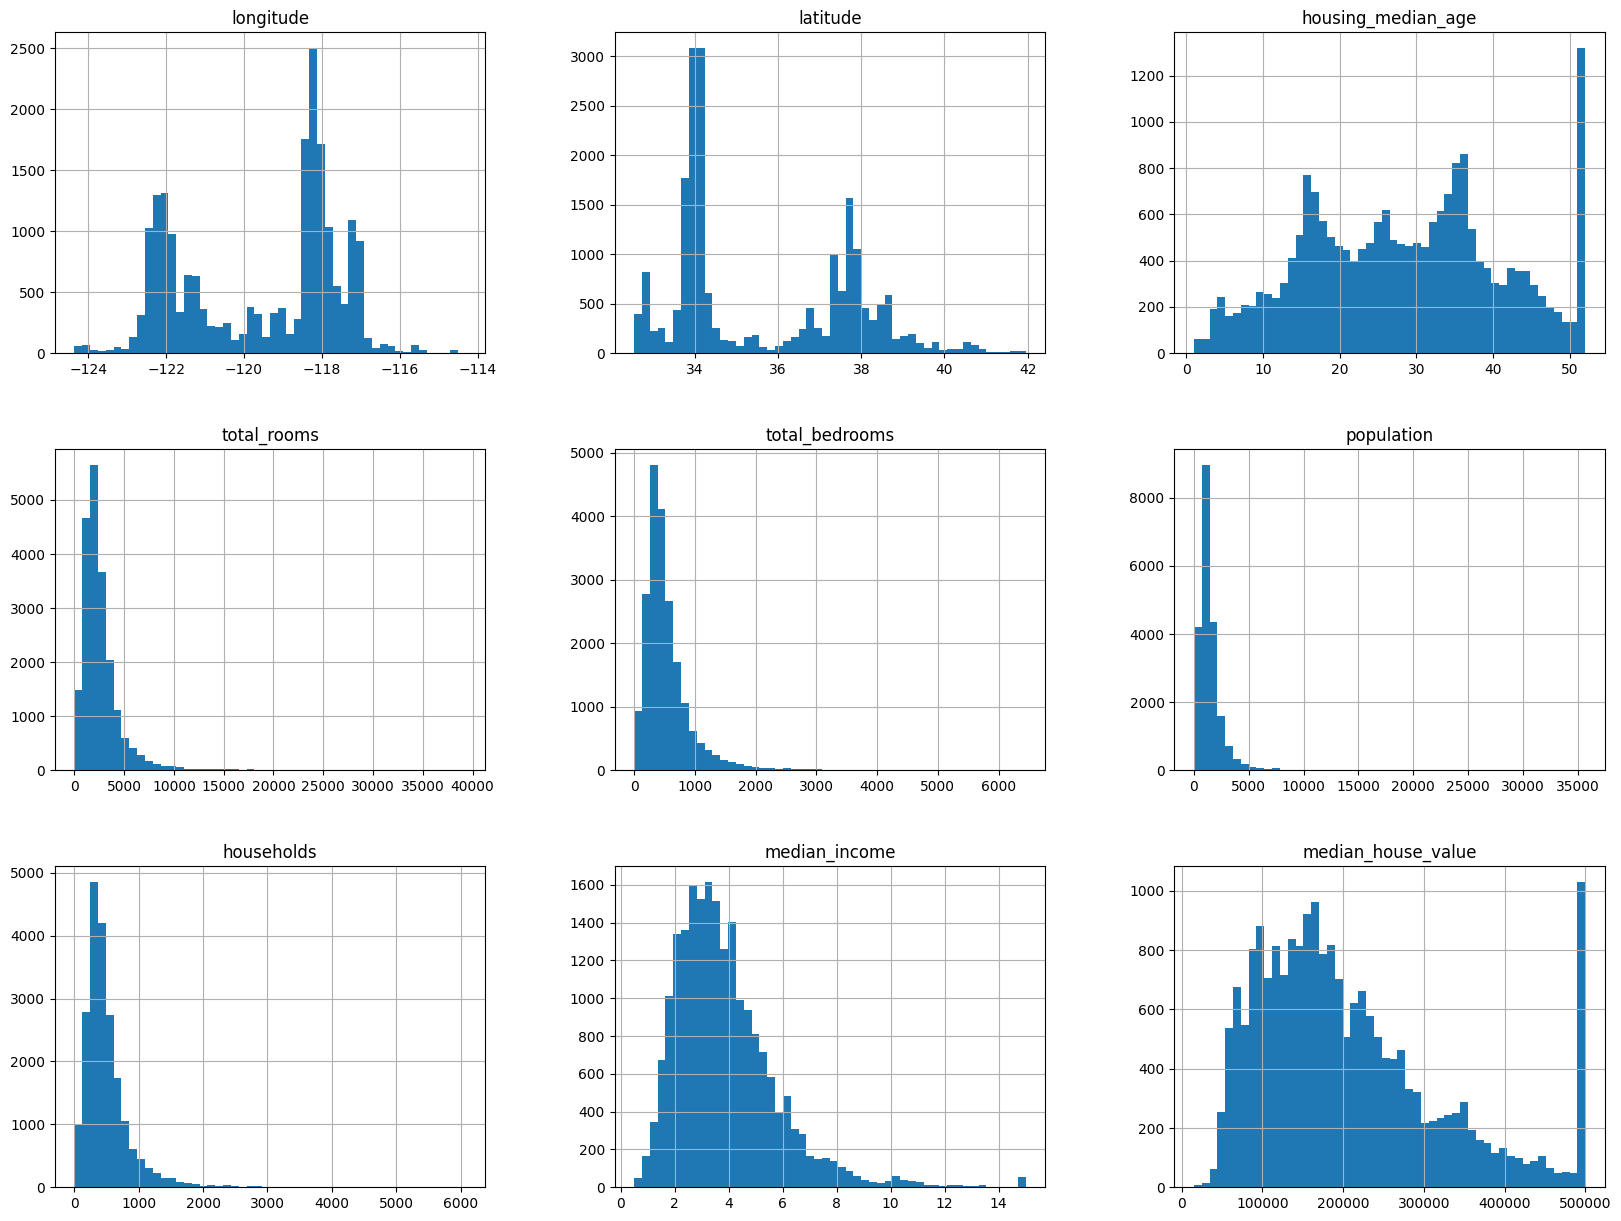

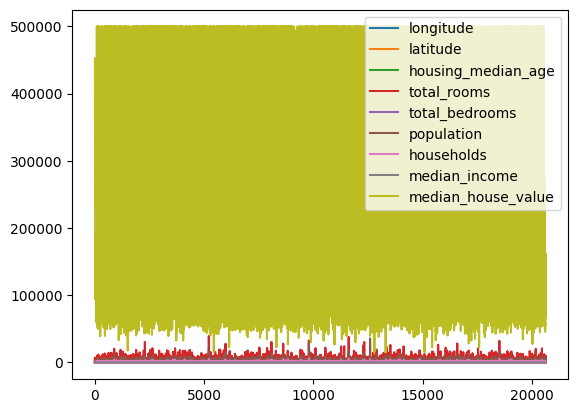

In [10]:
data.hist(bins=50, figsize=(20,15))
data.plot()

### 2. Splitting the data into train and test sets
Use stratified sampling: Population is divided into homogenous subgroups (=stratas), ensuring that each stratum is representative of the overall population.  
Split data into training set and test set, stratified based on income.

<Axes: xlabel='Income category', ylabel='Number of districts'>

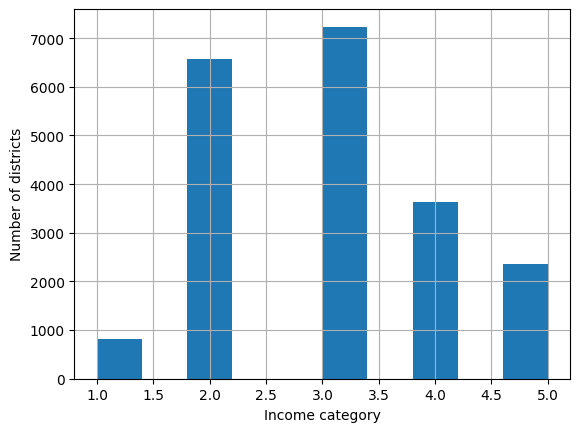

In [11]:
# Define category for income
data["income_cat"] = pd.cut(data["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

plt.xlabel("Income category")
plt.ylabel("Number of districts")
data["income_cat"].hist()

In [12]:
# stratified split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data["income_cat"])

In [13]:
# Income category is no longer needed, so drop it
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 3. Data Exploration

In [14]:
# Copy data for exploration and visualization
data_explore = train_set.copy()

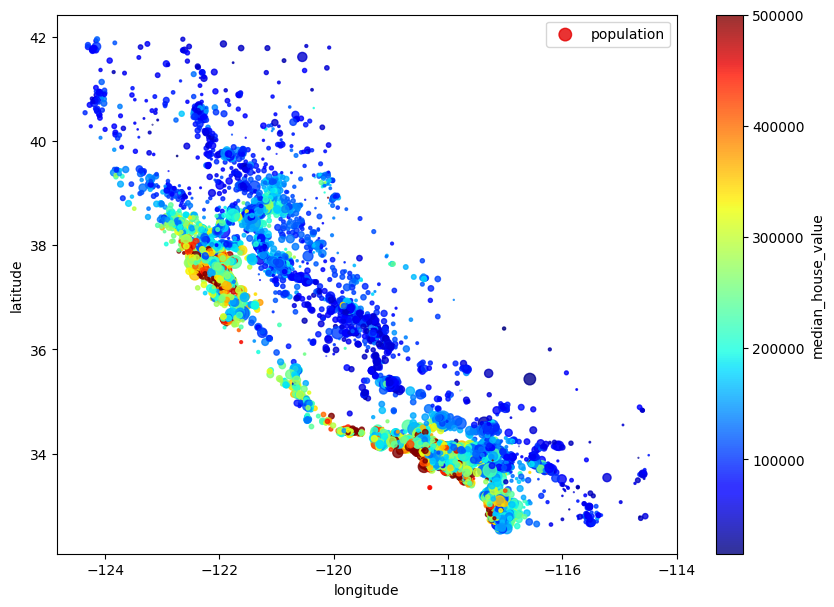

In [15]:
data_explore.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
                    s=data_explore["population"]/100, label="population", figsize=(10,7),
                    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()


In [16]:
correlation_matrix = data_explore.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

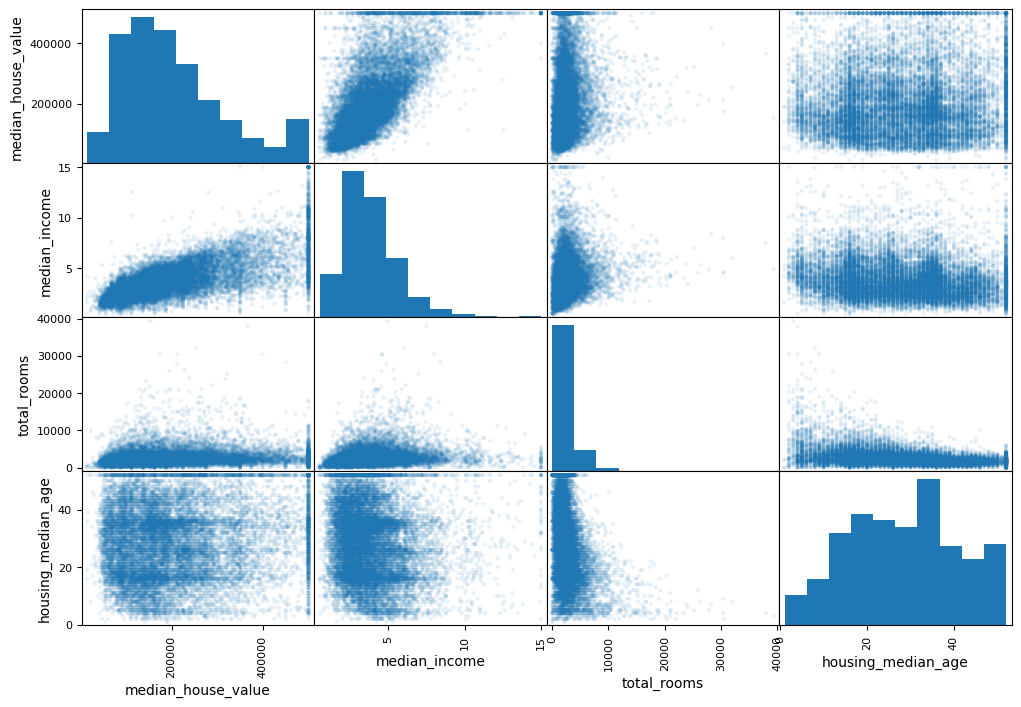

In [17]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(data_explore[attributes], figsize=(12,8), alpha=0.1)


### 4. Preparing Data: Cleaning, Feature Scaling, Seperating Target Values

In [18]:
# Split data in numerical and categorical
data_num = data_explore.select_dtypes(include=[np.number])
data_cat = data_explore.select_dtypes(exclude=[np.number])

In [19]:
# Playing around with the IterativeImputer for missing values
# (output is not used going forward)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=30, random_state=42)
imputer.fit(data_num)

X = imputer.transform(data_num)
data_num_imputed = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

data_num_imputed.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

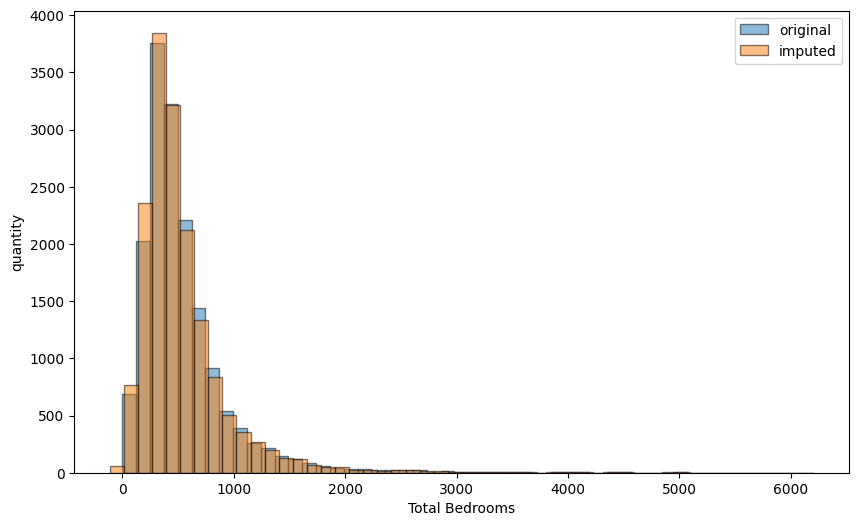

In [20]:
plt.figure(figsize=(10, 6))

plt.hist(data_num['total_bedrooms'], bins=50, edgecolor='k', alpha=0.5, label='original')
plt.hist(data_num_imputed['total_bedrooms'], bins=50, edgecolor='k', alpha=0.5, label='imputed')
plt.xlabel('Total Bedrooms')
plt.ylabel('quantity')
plt.legend()

plt.show()

There is an issue: The IterativeImputer creates negative values for total_bedrooms.

In [21]:
print(f"Number of negative values after imputation: {(data_num_imputed['total_bedrooms'] <0).sum()}")
data_num_imputed['total_bedrooms'][data_num_imputed['total_bedrooms'] <0]

Number of negative values after imputation: 2


15857    -11.690796
1984    -114.270386
Name: total_bedrooms, dtype: float64

Because the IterativeImputer only produces two negative values, we will just set them to (close to) zero.

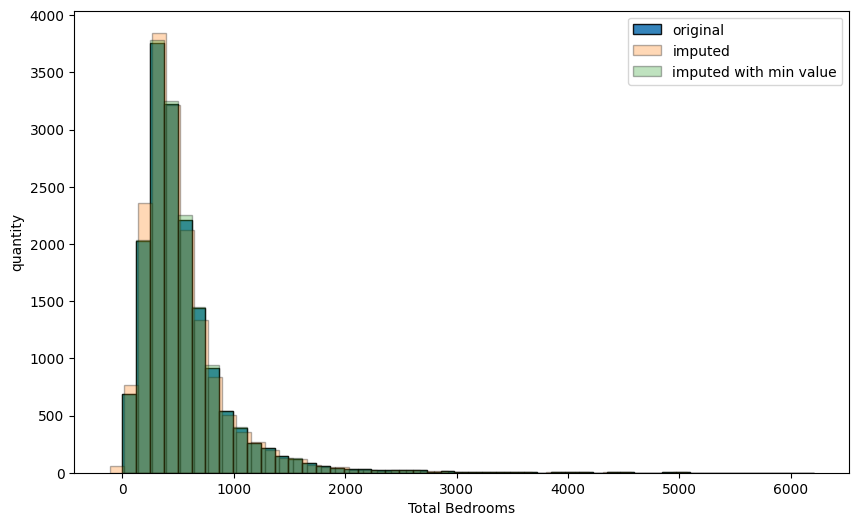

In [22]:
imputer = IterativeImputer(max_iter=30, random_state=42, min_value=0.0001)
imputer.fit(data_num)

X = imputer.transform(data_num)
data_num_imputed_corrected = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

plt.figure(figsize=(10, 6))

plt.hist(data_num['total_bedrooms'], bins=50, edgecolor='k', alpha=0.9, label='original')
plt.hist(data_num_imputed['total_bedrooms'], bins=50, edgecolor='k', alpha=0.3, label='imputed')
plt.hist(data_num_imputed_corrected['total_bedrooms'], bins=50, edgecolor='k', alpha=0.3, label='imputed with min value')
plt.xlabel('Total Bedrooms')
plt.ylabel('quantity')
plt.legend()

plt.show()


In [23]:
# Seperate target from data
train_set_target = train_set["median_house_value"].copy()
train_set.drop("median_house_value", axis=1, inplace=True)

### 5. Pipelines

In [24]:
# Custom Transformer based on KMeans clustering using rbf kernel
# p.82 in book

# Explanation:

# Similar districts should have similar median house values. 
# In a first step, the transformer uses KMeans clustering to find centroids in 
# the geographical data.
# In a second step, the transformer calculates the smiliarity of each district 
# based on the median house values
# to each centroids using the Gaussian radial basis function (RBF) kernel.

# Number of clusters and gamma parameter are hyperparameters for future tuning.
# Gamma controls the width of the Gaussian RBF kernel by controlling the decay of
# similiarity with distance from the centroid.


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    # By inheriting from BaseEstimator set_params() and get_params() are included
    # By inheriting from TransformerMixin fit_transform() is included,
    # which calls fit() and then transform().

    def __init__(self, n_clusters=10, gamma=1.0, random_state=42):
        """ Initialize the ClusterSimilarity transformer.

        Args:
            n_clusters (int, optional): The number of clusters/centroids to form. 
                Defaults to 10.
            gamma (float, optional): Decay of RBF with distance from centroid.
                Defaults to 1.0.
            random_state (int, optional): Seed for k-means. Defaults to 42.
        """
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        """ Fit the ClusterSimilarity transformer.

        Args:
            X {array-like, sparse matrix}: Dataframe with features.
            y : Ignored
                Scikit-learn needs y in fit although not used. Defaults to None.
            sample_weight (ArrayLike, optional): Relative weight of the individual samples.
                Defaults to None.

        Returns:
            self: Object
        """
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        """ Transform the data using the ClusterSimilarity transformer.

        Args:
            X {array-like, sparse matrix}: Dataframe with features

        Returns:
            ndarray: Transformed data
        """
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [25]:
# Call the transformer on the exploration dataset
cluster_similarity = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarities = cluster_similarity.fit_transform(data_explore[['latitude', 'longitude']],
                                               sample_weight=data_explore['median_house_value'])
print(type(similarities)) # Numpy array
print(similarities.shape) # Matrix of m districts x n centroids. Each entry is the similarity of the district to the centroid.
print(similarities[:5].round(2))

<class 'numpy.ndarray'>
(16512, 10)
[[0.08 0.   0.6  0.   0.   0.99 0.   0.   0.   0.14]
 [0.   0.99 0.   0.04 0.   0.   0.11 0.   0.63 0.  ]
 [0.44 0.   0.3  0.   0.   0.7  0.   0.01 0.   0.29]
 [0.   0.21 0.   0.51 0.   0.   0.   0.   0.64 0.  ]
 [0.   0.89 0.   0.14 0.   0.   0.03 0.   0.86 0.  ]]


In [26]:
# Pipelines based on book, changes:
# - naming of pipelines instead of make_pipeline
# - IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

def ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        #SimpleImputer(strategy="median"), Used in the book
        IterativeImputer(max_iter=10, random_state=42, min_value=0.0001),
        FunctionTransformer(ratio, feature_names_out=ratio_name),
        StandardScaler())


log_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")), Used in the book
        ('imputerIt', IterativeImputer(max_iter=10, random_state=42, min_value=0.0001)),
        ('log', FunctionTransformer(np.log1p, validate=False, feature_names_out="one-to-one")), #np.log1p(x) = log(x+1) Book uses np.log(x)
        ('standardize', StandardScaler()),
    ])

cluster_sim = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

default_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder', OneHotEncoder()),
    ])

# ColumnTransformer applies the different pipelines to the dataset
# Constructor expects a tuple of (name, transformer, columns)
# Alternative: make_column_transformer () to avoid naming of each pipeline

preprocessing_pipeline = ColumnTransformer([ 
        ("bedroom_ratio", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_household", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_household", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("cluster_similarity", cluster_sim, ["longitude", "latitude"]),
        
        # make_column_selector can be used to select columns based on dtype instead of column name
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)), 
        
    ],
    remainder=default_pipeline) # catch all remaining columns. Could also be "drop" or "passthrough".

In [27]:
data_prepared = preprocessing_pipeline.fit_transform(train_set)
print(data_prepared.shape)

(16512, 24)


In [28]:
np.isnan(data_prepared).sum()

0

In [29]:
data_prepared_pandas = pd.DataFrame(data_prepared, columns=preprocessing_pipeline.get_feature_names_out(), index=train_set.index)
data_prepared_pandas.head()

,bedroom_ratio__ratio,rooms_per_household__ratio,people_per_household__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cluster_similarity__Cluster 0 similarity,cluster_similarity__Cluster 1 similarity,...,cluster_similarity__Cluster 6 similarity,cluster_similarity__Cluster 7 similarity,cluster_similarity__Cluster 8 similarity,cluster_similarity__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,2.142676,-0.866027,-0.330204,1.320986,0.638538,0.457313,1.317893,-1.078547,8.708837e-08,9.712456e-01,...,7.114441e-04,3.070969e-17,1.314047e-01,5.740031e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.571526,0.024550,-0.253616,-0.252632,-0.064085,-0.713720,-0.144801,1.231761,1.181328e-01,9.738096e-14,...,3.045359e-27,5.437838e-01,1.735342e-09,2.275194e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.218854,-0.041193,-0.051041,-0.922563,-0.861510,-0.944405,-0.919687,-0.792464,2.295286e-08,7.457782e-01,...,4.750719e-03,1.605970e-17,2.744847e-01,2.839978e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.157592,-0.034858,-0.141475,0.950151,0.944663,0.671649,0.929933,-0.935308,4.618947e-04,3.873884e-20,...,2.916178e-35,7.405721e-01,2.243339e-14,4.218649e-16,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,1.124404,-0.666554,-0.306148,1.434360,1.004887,0.720167,1.490342,-0.018667,3.166634e-02,7.905346e-16,...,2.843975e-30,7.501278e-01,2.890866e-11,3.710912e-12,0.0,0.0,0.0,0.0,1.0,0.589800


### 6. Select and train a model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_reg = make_pipeline(preprocessing_pipeline, LinearRegression())
tree_reg = make_pipeline(preprocessing_pipeline, DecisionTreeRegressor(random_state=42))
forest_reg = make_pipeline(preprocessing_pipeline, RandomForestRegressor(random_state=42))

#### Evaluation on training set

In [31]:
# Clone pipeline to avoid changing the original pipeline
from sklearn.base import clone
lin_reg_pure = clone(lin_reg)
tree_reg_pure = clone(tree_reg)
forest_reg_pure = clone(forest_reg)

In [32]:
lin_reg.fit(train_set, train_set_target)
tree_reg.fit(train_set, train_set_target)
forest_reg.fit(train_set, train_set_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(min_value=0.0001,
                                                                                    random_state=42)),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=...
                                                   'median_income']),
                                                 ('cluster_similarity',
                                                  ClusterSimilarity(),
                                                  ['longitude', 'latitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C72E237B90>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [33]:
# Evaluation of models on training set
predictions_lin = lin_reg.predict(train_set)
predictions_tree = tree_reg.predict(train_set)
predictions_forest = forest_reg.predict(train_set)

print(f"Target variable:   {train_set_target.iloc[:5].values}")
print(f"Linear regression: {predictions_lin[:5].round(-2)}")
print(f"Tree regression:   {predictions_tree[:5].round(-2)}")
print(f"Forest regression: {predictions_forest[:5].round(-2)}")



Target variable:   [458300. 483800. 101700.  96100. 361800.]
Linear regression: [252700. 377800. 118400.  90700. 326800.]
Tree regression:   [458300. 483800. 101700.  96100. 361800.]
Forest regression: [427000. 473200. 105600.  99100. 374000.]


In [34]:
from sklearn.metrics import mean_squared_error

mse_lin = mean_squared_error(train_set_target, predictions_lin, squared=False)
mse_tree = mean_squared_error(train_set_target, predictions_tree, squared=False)
mse_forest = mean_squared_error(train_set_target, predictions_forest, squared=False)

print(f"MSE linear regression: {mse_lin:.2f}")
print(f"MSE tree regression:   {mse_tree:.2f}")
print(f"MSE forest regression: {mse_forest:.2f}")

MSE linear regression: 66563.64
MSE tree regression:   0.00
MSE forest regression: 17528.64


#### Evaluation on test set

In [35]:
# Prepare the test set. Remove the target variable
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

In [36]:
prediction_test_lin = lin_reg.predict(X_test)
prediction_test_tree = tree_reg.predict(X_test)
prediction_test_forest = forest_reg.predict(X_test)

mse_test_lin = mean_squared_error(y_test, prediction_test_lin, squared=False)
mse_test_tree = mean_squared_error(y_test, prediction_test_tree, squared=False)
mse_test_forest = mean_squared_error(y_test, prediction_test_forest, squared=False)

print(f"MSE linear regression: {mse_test_lin:.2f}")
print(f"MSE tree regression:   {mse_test_tree:.2f}")
print(f"MSE forest regression: {mse_test_forest:.2f}")

MSE linear regression: 73968.30
MSE tree regression:   67508.36
MSE forest regression: 47393.89


#### Cross-Validation

In [37]:
# Use cross validation to evaluate the models on the data/pipelines before fitting
from sklearn.model_selection import cross_val_score

scores_lin = -cross_val_score(lin_reg_pure, train_set, train_set_target,
                                scoring="neg_root_mean_squared_error", cv=10)

In [38]:
scores_tree = -cross_val_score(tree_reg_pure, train_set, train_set_target,
                                scoring="neg_root_mean_squared_error", cv=10)

In [39]:
scores_forest = -cross_val_score(forest_reg_pure, train_set, train_set_target,
                                scoring="neg_root_mean_squared_error", cv=10)

In [40]:
print(f"MSE linear regression: {pd.Series(scores_lin).describe().iloc[1]:.2f}")
print(f"MSE tree regression:   {pd.Series(scores_tree).describe().iloc[1]:.2f}")
print(f"MSE forest regression: {pd.Series(scores_forest).describe().iloc[1]:.2f}")

MSE linear regression: 67962.03
MSE tree regression:   66613.47
MSE forest regression: 46970.43


### 7. Fine tuning of hyperparameters

In [41]:
forest_reg = Pipeline([
        ("preprocessing", preprocessing_pipeline),
        ("forest_reg", RandomForestRegressor(random_state=42)),
        ])


#### 7.1 GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid_forest = [
    {'preprocessing__cluster_similarity__n_clusters': [20, 25, 30],
     'preprocessing__cluster_similarity__gamma': [0.1, 0.5, 1.0],
     'forest_reg__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(forest_reg, param_grid_forest, cv=3,
                            scoring='neg_root_mean_squared_error',
                            return_train_score=True)

In [43]:
# This will take a while...
# Hence, the results are saved in a file and loaded in the next cell
# The function call is behind an if statement to avoid running fit() every time

run_grid_search = False

if run_grid_search:
    grid_search.fit(train_set, train_set_target)

In [44]:
# save the model to disk
import joblib
grid_search_pickle = 'grid_search.pkl'

if run_grid_search:
    joblib.dump(grid_search, grid_search_pickle)
else:
    grid_search = joblib.load(grid_search_pickle)


In [45]:
grid_search.best_params_

{'forest_reg__max_features': 6,
 'preprocessing__cluster_similarity__gamma': 0.1,
 'preprocessing__cluster_similarity__n_clusters': 30}

In [46]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest_reg__max_features,param_preprocessing__cluster_similarity__gamma,param_preprocessing__cluster_similarity__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,12.551476,0.148153,0.081794,0.004855,6,0.1,30,"{'forest_reg__max_features': 6, 'preprocessing...",-41440.943392,-42729.123805,-43114.933538,-42428.333578,715.735902,1,-16198.190435,-16016.439800,-15688.948874,-15967.859703,210.715861
4,9.732585,0.258980,0.082513,0.001414,6,0.5,25,"{'forest_reg__max_features': 6, 'preprocessing...",-41613.618575,-42671.350818,-43099.514113,-42461.494502,624.500410,2,-16305.576103,-16158.529739,-15839.497309,-16101.201050,194.546129
8,8.539712,0.045564,0.077011,0.001776,6,1.0,30,"{'forest_reg__max_features': 6, 'preprocessing...",-41688.827756,-42537.897756,-43245.713886,-42490.813133,636.467504,3,-16290.332940,-16009.927408,-15713.796678,-16004.685675,235.399125
14,12.278134,0.146460,0.083195,0.006946,8,0.5,30,"{'forest_reg__max_features': 8, 'preprocessing...",-41670.806003,-42765.146500,-43074.391786,-42503.448096,602.150481,4,-16238.860196,-16167.140676,-15699.343260,-16035.114711,239.224822
5,9.576965,0.106898,0.080526,0.004956,6,0.5,30,"{'forest_reg__max_features': 6, 'preprocessing...",-41686.518969,-42678.259378,-43199.294824,-42521.357724,627.474458,5,-16229.490568,-15972.161967,-15759.864930,-15987.172489,192.017442


#### 7.2 RandomizedSearch

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

param_random_forest = {
    'preprocessing__cluster_similarity__n_clusters': randint(low=10, high=50),
    'preprocessing__cluster_similarity__gamma': uniform(0.1, 0.9),
    'forest_reg__max_features': randint(4, 15),
}

rand_search = RandomizedSearchCV(forest_reg,
                                 param_distributions=param_random_forest,
                                 n_iter=20, cv=3,
                                 scoring='neg_root_mean_squared_error',
                                 random_state=42)

rand_search.fit(train_set, train_set_target)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedroom_ratio',
                                                                               Pipeline(steps=[('iterativeimputer',
                                                                                                IterativeImputer(min_value=0.0001,
                                                                                                                 random_state=42)),
                                                                                               ('functiontransformer',
                                                                                                Function...
                   param_distributions={'forest_reg__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C72EE66D80>,
                                        'preprocessing__cluster_similarity__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C72EE648F0>,
                                        'preprocessing__cluster_similarity__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C72EE64E30>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [48]:
rand_search_results = pd.DataFrame(rand_search.cv_results_)
rand_search_results.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest_reg__max_features,param_preprocessing__cluster_similarity__gamma,param_preprocessing__cluster_similarity__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,14.446479,0.224797,0.122301,0.000616,8,0.972919,39,"{'forest_reg__max_features': 8, 'preprocessing...",-41185.091350,-42408.284556,-42782.487676,-42125.287861,682.145685,1
15,11.276369,0.103805,0.122598,0.000238,6,0.918388,45,"{'forest_reg__max_features': 6, 'preprocessing...",-41356.045349,-42393.310518,-42888.724232,-42212.693366,638.614676,2
3,27.860546,0.185990,0.122457,0.001276,14,0.513324,45,"{'forest_reg__max_features': 14, 'preprocessin...",-41552.899924,-42547.174365,-42965.433930,-42355.169406,592.431435,3
6,22.604243,0.063924,0.122474,0.000820,9,0.100701,30,"{'forest_reg__max_features': 9, 'preprocessing...",-41875.598806,-42790.211153,-43095.235099,-42587.015019,518.230755,4
8,25.794015,0.153865,0.122066,0.001070,12,0.362106,37,"{'forest_reg__max_features': 12, 'preprocessin...",-41732.213127,-42868.061453,-43327.279453,-42642.518011,670.428485,5


#### 7.3 Analysis of model

In [49]:
model = rand_search.best_estimator_
feature_importances = model["forest_reg"].feature_importances_
sorted(zip(feature_importances,
            model["preprocessing"].get_feature_names_out()),
            reverse=True)

[(0.20735596807712267, 'log__median_income'),
 (0.07404515234202143, 'cat__ocean_proximity_INLAND'),
 (0.061553849855609674, 'bedroom_ratio__ratio'),
 (0.05541406432601289, 'people_per_household__ratio'),
 (0.051339431856114996, 'rooms_per_household__ratio'),
 (0.03227990907009438, 'cluster_similarity__Cluster 35 similarity'),
 (0.03135024984453867, 'cluster_similarity__Cluster 16 similarity'),
 (0.025625598821498615, 'cluster_similarity__Cluster 3 similarity'),
 (0.02501399026303531, 'cluster_similarity__Cluster 15 similarity'),
 (0.02304576739752061, 'cluster_similarity__Cluster 34 similarity'),
 (0.02081812735039387, 'cluster_similarity__Cluster 25 similarity'),
 (0.020198430187451155, 'cluster_similarity__Cluster 6 similarity'),
 (0.017271821544267856, 'cluster_similarity__Cluster 17 similarity'),
 (0.014864185112955364, 'cluster_similarity__Cluster 24 similarity'),
 (0.014630838647222963, 'cluster_similarity__Cluster 18 similarity'),
 (0.013318024187984685, 'cluster_similarity__Cl

In [50]:
from sklearn.feature_selection import SelectFromModel



### 8. Evaluation of final model on the test set

In [51]:
final_predictions = model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(f"Final RMSE: {final_rmse:.2f}")

Final RMSE: 41657.21


In [52]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39497.45976844, 43710.37158651])

In [53]:
joblib.dump(model, "final_model.pkl")

['final_model.pkl']